<a href="https://www.kaggle.com/code/cicinguyen/how-popular-is-retinol-in-skincare-products?scriptVersionId=140304455" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sephora-products-and-skincare-reviews/product_info.csv
/kaggle/input/sephora-products-and-skincare-reviews/reviews_500-750.csv
/kaggle/input/sephora-products-and-skincare-reviews/reviews_750-1250.csv
/kaggle/input/sephora-products-and-skincare-reviews/reviews_1250-end.csv
/kaggle/input/sephora-products-and-skincare-reviews/reviews_250-500.csv
/kaggle/input/sephora-products-and-skincare-reviews/reviews_0-250.csv


## About the dataset

A compilation of user reviews—exceeding 1 million in quantity—associated with over 2,000 products within the Skincare category. These reviews encompass user experiences, appearances, and review ratings provided by other users.

## Objectives

- Investigate the price distribution of retinol skincare products across multiple categories.
- Analyze the key factors contributing to the pricing variations of retinol products.
- Identify and highlight prominent brands that offer retinol-containing skincare items.
- Explore the popularity and reception of retinol as an ingredient among consumers.
- Gain insights into consumer preferences and behaviors related to retinol-based skincare products.
- Provide a comprehensive understanding of the relationship between retinol, pricing, brands, and popularity within the skincare market.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

product = pd.read_csv('/kaggle/input/sephora-products-and-skincare-reviews/product_info.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
product['retinol'] = product['ingredients'].str.contains('Retinol')
product_retinol = product[product['retinol']==True]
product_retinol.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,retinol
114,P433469,ELEVATE Advanced Retinol Serum,6018,Algenist,5451,4.1026,39.0,1 oz/ 30 mL,Size,1 oz/ 30 mL,...,0,0,"['Vegan', 'Retinol', 'Hypoallergenic', 'Good f...",Skincare,Treatments,Face Serums,0,NaN,NaN,True
123,P442540,Vitamin A Serum with 0.5% Retinol,6283,Alpha-H,7074,4.3579,95.0,0.85 oz/ 25 mL,Size,0.85 oz/ 25 mL,...,0,0,"['Vegan', 'Good for: Dullness/Uneven Texture',...",Skincare,Treatments,Face Serums,0,NaN,NaN,True
129,P442542,Beauty Sleep Power Peel Age-Defying Night Peel,6283,Alpha-H,6057,4.6000,15.0,1.69 oz/ 50 mL,Size,1.69 oz/ 50 mL,...,0,0,"['Good for: Dullness/Uneven Texture', 'Clean a...",Skincare,Treatments,Facial Peels,0,NaN,NaN,True
630,P501213,Squalane + Retinol Night Serum,6195,Biossance,12007,4.4742,213.0,1 oz / 30 mL,Size,1 oz / 30 mL,...,0,1,"['Vegan', 'Good for: Dullness/Uneven Texture',...",Skincare,Treatments,Face Serums,0,NaN,NaN,True
1240,P433521,Charlotte’s Magic Eye Cream with Retinol,6236,Charlotte Tilbury,31496,4.3539,842.0,0.5 oz/ 15 mL,Size,0.5 oz/ 15 mL,...,0,0,"['Refill Available', 'Vitamin C', 'Good for: D...",Skincare,Eye Care,Eye Creams & Treatments,1,59.0,59.0,True


# **Data Descriptions**

In [4]:
product_retinol.info()
product_retinol.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 114 to 7952
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          105 non-null    object 
 1   product_name        105 non-null    object 
 2   brand_id            105 non-null    int64  
 3   brand_name          105 non-null    object 
 4   loves_count         105 non-null    int64  
 5   rating              103 non-null    float64
 6   reviews             103 non-null    float64
 7   size                89 non-null     object 
 8   variation_type      89 non-null     object 
 9   variation_value     87 non-null     object 
 10  variation_desc      1 non-null      object 
 11  ingredients         105 non-null    object 
 12  price_usd           105 non-null    float64
 13  value_price_usd     11 non-null     float64
 14  sale_price_usd      1 non-null      float64
 15  limited_edition     105 non-null    int64  
 16  new  

(105, 28)

# **Visualize**

**Price Distribution of Retinol Products**

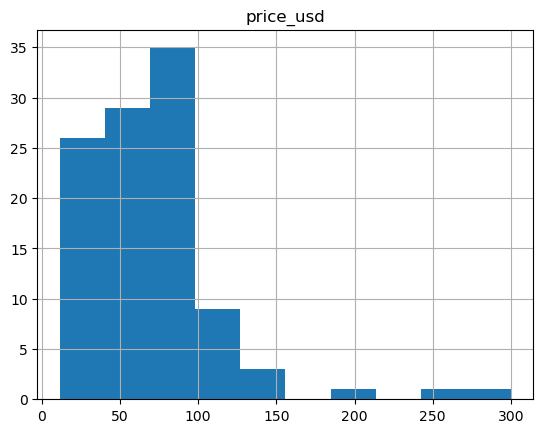

In [5]:
product_retinol.hist('price_usd')
plt.show()

The significant peak in the $70-$100 price range indicates a potential "sweet spot" in pricing for retinol products. 

The presence of a smaller number of products in the higher price ranges (above $100) suggests the availability of luxury or premium retinol products catering to a specific market segment that is willing to invest more in skincare.

Price segmentation could indicate product differentiaton based on formulation, concentration of retinol, additional ingredients, or packaging.
The small number of products in the higher price ranges suggest that the market for premium retinol products may be limited. 

Let's see what makes the price differeces.

**Ingredient Analysis**

In [6]:
category = []
for index, row in product_retinol.iterrows():
    price = row['price_usd']
    if price <= 70:
        category.append('Budget')
    elif 70 < price <= 100:
        category.append('Mid-range')
    elif 100 < price <= 250:
        category.append('Premium')
    else: 
        category.append('Luxury')
product_retinol['Category'] = category

product_retinol.head()

/tmp/ipykernel_20/431989306.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_retinol['Category'] = category


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,retinol,Category
114,P433469,ELEVATE Advanced Retinol Serum,6018,Algenist,5451,4.1026,39.0,1 oz/ 30 mL,Size,1 oz/ 30 mL,...,0,"['Vegan', 'Retinol', 'Hypoallergenic', 'Good f...",Skincare,Treatments,Face Serums,0,NaN,NaN,True,Mid-range
123,P442540,Vitamin A Serum with 0.5% Retinol,6283,Alpha-H,7074,4.3579,95.0,0.85 oz/ 25 mL,Size,0.85 oz/ 25 mL,...,0,"['Vegan', 'Good for: Dullness/Uneven Texture',...",Skincare,Treatments,Face Serums,0,NaN,NaN,True,Budget
129,P442542,Beauty Sleep Power Peel Age-Defying Night Peel,6283,Alpha-H,6057,4.6000,15.0,1.69 oz/ 50 mL,Size,1.69 oz/ 50 mL,...,0,"['Good for: Dullness/Uneven Texture', 'Clean a...",Skincare,Treatments,Facial Peels,0,NaN,NaN,True,Premium
630,P501213,Squalane + Retinol Night Serum,6195,Biossance,12007,4.4742,213.0,1 oz / 30 mL,Size,1 oz / 30 mL,...,1,"['Vegan', 'Good for: Dullness/Uneven Texture',...",Skincare,Treatments,Face Serums,0,NaN,NaN,True,Mid-range
1240,P433521,Charlotte’s Magic Eye Cream with Retinol,6236,Charlotte Tilbury,31496,4.3539,842.0,0.5 oz/ 15 mL,Size,0.5 oz/ 15 mL,...,0,"['Refill Available', 'Vitamin C', 'Good for: D...",Skincare,Eye Care,Eye Creams & Treatments,1,59.0,59.0,True,Budget


<Figure size 1000x600 with 0 Axes>

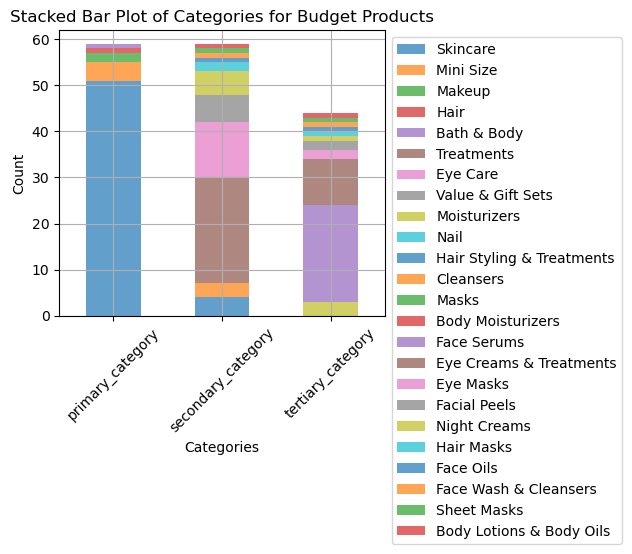

<Figure size 1000x600 with 0 Axes>

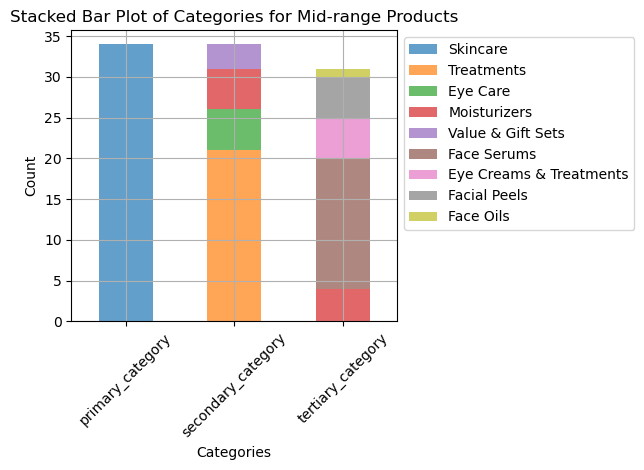

<Figure size 1000x600 with 0 Axes>

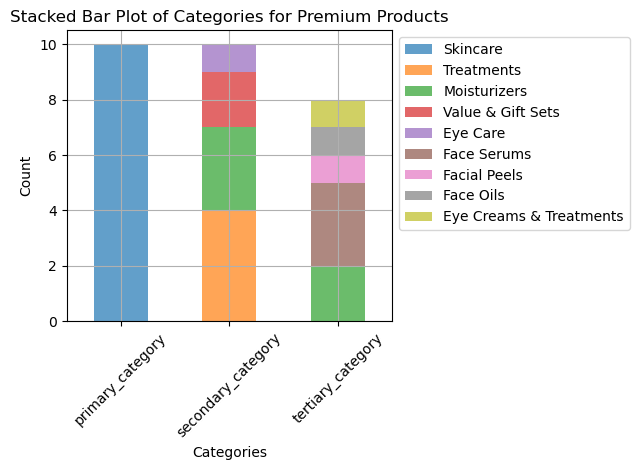

<Figure size 1000x600 with 0 Axes>

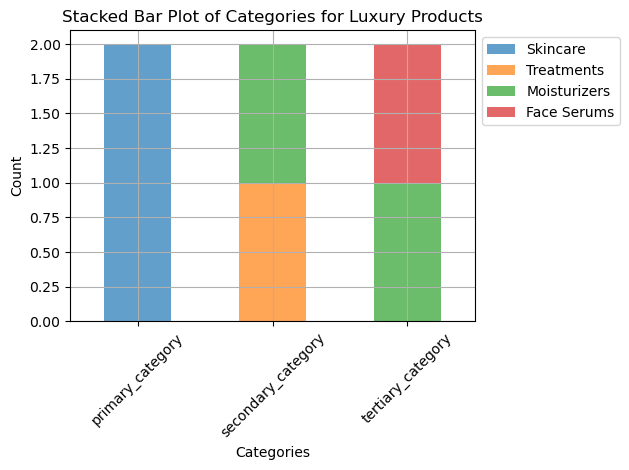

In [7]:
price_category = ['Budget', 'Mid-range', 'Premium', 'Luxury']
category_col = ['primary_category', 'secondary_category', 'tertiary_category']
#base_colors ={'primary_category':'tab:blue', 'secondary_category':'tab:orange', 'tertiary_category':'tab:green'}
shade_var = 0.3

#color_palette = []

for price in price_category:
    plt.figure(figsize=(10,6))
    
    filtered_dt = product_retinol[product_retinol['Category']== price]
    
    category_count = []

    for col in category_col:
        category_val = filtered_dt[col]
        category_count.append(category_val.value_counts())
    
    stacked_dt = pd.DataFrame(category_count, index=category_col)
    
    stacked_dt.plot(kind='bar', stacked=True, alpha=0.7)
    plt.title(f'Stacked Bar Plot of Categories for {price} Products')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

****Observations:****

* Budget Products:

The primary category for budget products is predominantly skincare.
In the secondary category, treatments and eye care products are the most prominent.
The tertiary category shows a focus on face serums and eye creams/treatments.

* Mid-range Products:

Similar to budget products, the primary category for mid-range products is entirely skincare.
In the secondary category, treatments maintain their significance, followed by eye care and moisturizers.
Within the tertiary category, there is an emphasis on face serums, followed by eye creams/treatments and facial peels.

* Premium Products:

Premium products also have skincare as their primary category.
The secondary category places emphasis on treatments and moisturizers.
Within the tertiary category, moisturizers and face serums take precedence.

* Luxury Products:

Luxury products are exclusively categorized under skincare for their primary category.
The secondary category continues the focus on treatments and moisturizers.
In the tertiary category, moisturizers and face serums remain dominant.


****What do we know about retinol products?****

Overall, skincare is a consistent and significant focus across all price ranges, emphasizing the importance of skincare routines. 

Retinol, renowned for its effectiveness in skin brightening, anti-aging, and firming, has garnered significant attention from both consumers and the skincare industry [1]. This popularity is reflected in the presence of retinol in a substantial portion of the products within the dataset.

Furthermore, the observed prominence of treatments, moisturizers, and face serums across various price ranges underscores the high value that consumers place on products designed to address specific skin concerns and provide optimal hydration. This consumer preference aligns with the widely recognized benefits of incorporating targeted treatments, nourishing moisturizers, and potent serums into skincare routines.

The combination of retinol's proven benefits and the consistent demand for products targeting diverse skin needs reinforces the dynamic and evolving nature of the skincare market.

**How does this affect product price?**

The higher pricing of skincare products containing retinol, particularly in categories like eye care and treatments, can be attributed to several factors:

* Advanced Formulation: Developing effective retinol-based products requires intricate formulation, involving costly research, testing, and ingredient sourcing.

* Potent Ingredients: High-quality retinol extracts, crucial for efficacy, can drive up costs due to advanced extraction methods and sourcing.  [2]

* Targeted Results: Products focus on visible outcomes like reduced fine lines, demanding specialized formulations and higher ingredient concentrations. 

* Specialized Packaging: To maintain stability, special packaging is needed, adding to manufacturing expenses. [3]

Let's see if the brand name affect product prize!

In [8]:
pd.set_option('display.max_rows', None)
high_end_brands = product_retinol.groupby(['Category','brand_name'])['price_usd'].mean().sort_values(ascending=False).reset_index()

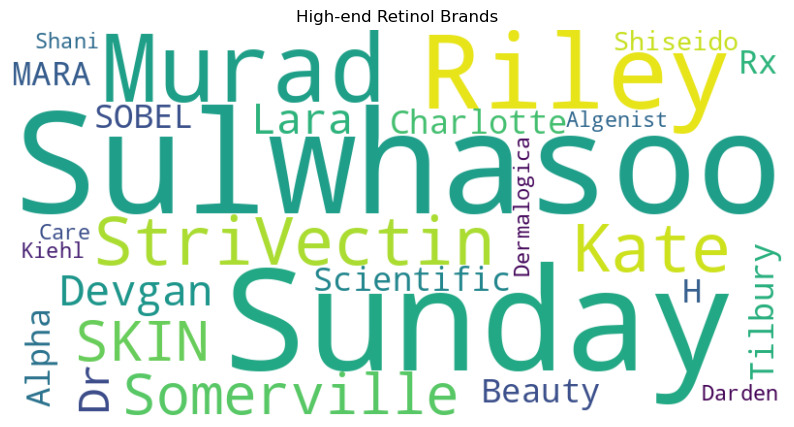

In [9]:
from wordcloud import WordCloud

top_high_end_brands = high_end_brands['brand_name'].head(20)

text = ' '.join(top_high_end_brands)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('High-end Retinol Brands')
plt.show()

**Does brand name affect product popularity though?**

In [10]:
brand_stats = product_retinol.groupby('brand_name')[['loves_count','rating','price_usd','reviews']].mean().sort_values(by=['loves_count','rating'], ascending=False).reset_index()
brand_stats.head(25)

,brand_name,loves_count,rating,price_usd,reviews
0,The Ordinary,195325.000000,4.454800,11.700000,708.000000
1,Glow Recipe,176653.000000,4.108700,42.000000,1886.000000
2,The INKEY List,78363.250000,4.238275,15.740000,517.750000
3,Drunk Elephant,69011.750000,4.437725,53.500000,459.750000
4,Dr. Dennis Gross Skincare,47517.928571,4.466443,73.285714,901.571429
5,Peace Out,43291.750000,4.234925,33.500000,686.250000
6,Shani Darden Skin Care,37941.000000,4.256900,59.000000,1012.000000
7,Topicals,36373.000000,4.447700,30.000000,172.000000
8,Sunday Riley,32924.500000,4.300750,93.750000,571.000000
9,Shiseido,31648.000000,4.436000,80.000000,280.000000


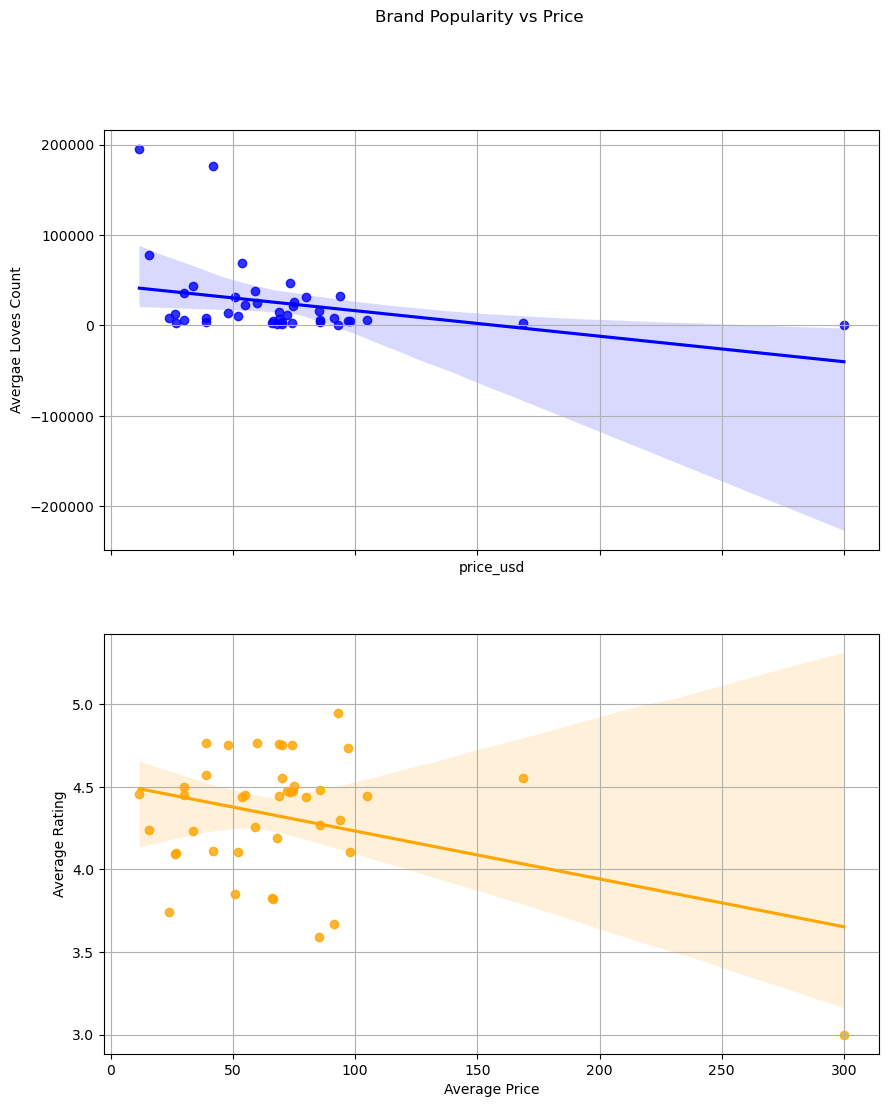

In [11]:
#Visualize relationship between brand name and popularity (loves_count, rating)
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10,12), sharex=True)

sns.regplot(x='price_usd', y='loves_count', data=brand_stats, ax=ax1, color='blue', label='Loves Count')
ax1.set_ylabel('Avergae Loves Count')
ax1.grid(True)

sns.regplot(x='price_usd', y='rating', data=brand_stats, ax=ax2, color='orange', label='Rating')
ax2.set_ylabel('Average Rating')
ax2.set_xlabel('Average Price')
ax2.grid(True)

plt.suptitle('Brand Popularity vs Price')

plt.show()

Some highlights from the plots:

* Love Counts and Rating by Brand Tier:

Budget and mid-range brands tend to have higher love counts and higher ratings compared to premium and luxury brands.
This suggests that consumers are more likely to show affection (mark as favorites) and give better ratings to products from budget and mid-range brands.

* No Love Counts for Premium and Luxury Brands:

The absence of love counts for premium and luxury brands could be attributed to their higher price points.

* Low Rating for Luxury Brands:

The observation of low ratings for luxury brands raises questions about potential factors contributing to this trend.
It could be due to high customer expectations associated with luxury brands, leading to more critical reviews when expectations are not met.


*It's hard to conclude that the higher price, the lower the product quality. On the other hand, the connection between brand tier and price is evident. Price can significantly influence how customers perceive and engage with products, as indicated by the love counts and ratings.
Consumers of budget and mid-range brands may feel a stronger sense of value and satisfaction, reflected in their higher love counts and ratings. For premium and luxury brands, factors such as exclusivity, brand image, and perceived quality might play a more significant role than love counts in customer engagement.*

**What are the most popular retinol products?**

In [12]:
import plotly.express as px

top_10_retinol = product_retinol.nlargest(10, ['rating','reviews'])

fig = px.bar(top_10_retinol, x='product_name', y='rating', color='brand_name', hover_data=['reviews', 'price_usd'], labels={'reviews': 'Number of Reviews', 'product_name': 'Product', 'price_usd': 'Price', 'secondary_category':'Category'}, title='Top 10 Most Popular Retinol Products', animation_frame='brand_name', width=800, height=600)
fig.update_traces(marker_line_color='rgb(0, 0, 0)', marker_line_width=2, hovertemplate="%{y} Reviews<br>%{customdata[0]}<br>Rating: %{customdata[1]:.2f}<br>Price: $%{customdata[2]:.2f}")

fig.update_layout(legend_title_text='Brand', xaxis_title='Product', yaxis_title='Ratings')
fig.show()

***So, how does retinol performance compare to other ingredients in the same category?***

In [13]:
other_product = product[product['ingredients']!='retinol']

#For retinol
retinol_rating = product_retinol['rating'].mean()
retinol_review = product_retinol['reviews'].mean()
retinol_loves = product_retinol['loves_count'].mean()
retinol_price = product_retinol['price_usd'].mean()

#other products
other_rating = other_product['rating'].mean()
other_review = other_product['reviews'].mean()
other_loves = other_product['loves_count'].mean()
other_price = other_product['price_usd'].mean()

data = {
    'Category': ['Retinol Products', 'Others'],
    'Rating': [retinol_rating, other_rating],
    'Review': [retinol_review, other_review],
    'Popularity': [retinol_loves, other_loves],
    'Price': [retinol_price, other_price]
}
df = pd.DataFrame(data)
df.head()

fig_rating = px.bar(df, x='Category', y='Rating', labels={'Category': 'Product Type', 'Review': 'Number of reviews', 'Rating': 'Rating'},
                   title='Ratings of Retinol vs Other Products', width=800, height=600)
fig_popularity = px.bar(df, x='Category', y='Popularity', labels={'Category': 'Product Type', 'Review': 'Number of reviews', 'Popularity': 'Love counts'},
                   title='Popularity of Retinol vs Other Products', width=800, height=600)
fig_price = px.bar(df, x='Category', y='Price', labels={'Category': 'Product Type', 'Review': 'Number of reviews', 'Price': 'Price'},
                   title='Price of Retinol vs Other Products', width=800, height=600)

fig_rating.show()
fig_popularity.show()
fig_price.show()

**Relevant References:**

[1] Borrego-Sánchez, Ana, et al. “Theoretical Study of Retinol, Niacinamide and Glycolic Acid with Halloysite Clay Mineral as Active Ingredients for Topical Skin Care Formulations.” Molecules, vol. 26, no. 15, 21 July 2021, p. 4392, https://doi.org/10.3390/molecules26154392. Accessed 1 Feb. 2022.

[2] Temova Rakuša, Žane, et al. “Quality Control of Retinoids in Commercial Cosmetic Products.” Journal of Cosmetic Dermatology, vol. 20, no. 4, 16 Sept. 2020, pp. 1166–1175, https://doi.org/10.1111/jocd.13686.

[3] “Retinoid Stability and Degradation Kinetics in Commercial Cosmetic Products.” Journal of Cosmetic Dermatology, vol. 20, no. 7, 2 Dec. 2020, https://doi.org/10.1111/jocd.13852.